In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime

# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Конфигурация путей
DATA_DIR = Path('data')
BOOKS_DIR = DATA_DIR / 'books'
STUDENT_WORKS_DIR = DATA_DIR / 'student-works'

print("=== Jane AI Assistant - EDA Анализ ===\n")
print(f"Дата анализа: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Директория с данными: {DATA_DIR}")
print(f"Книги: {BOOKS_DIR}")
print(f"Студенческие работы: {STUDENT_WORKS_DIR}")

=== Jane AI Assistant - EDA Анализ ===

Дата анализа: 2025-12-15 12:46:42
Директория с данными: data
Книги: data/books
Студенческие работы: data/student_works


In [4]:
# 1.1. Сбор метаданных о файлах
def collect_file_metadata(directory, extensions):
    """Сбор метаданных о файлах"""
    metadata = []

    for ext in extensions:
        for file_path in directory.glob(f'**/*{ext}'):
            try:
                file_stat = file_path.stat()
                metadata.append({
                    'file_name': file_path.name,
                    'file_path': str(file_path),
                    'file_size_mb': file_stat.st_size / (1024 * 1024),
                    'file_extension': ext,
                    'last_modified': datetime.fromtimestamp(file_stat.st_mtime),
                    'relative_path': str(file_path.relative_to(DATA_DIR))
                })
            except Exception as e:
                print(f"Ошибка при обработке файла {file_path}: {e}")

    return pd.DataFrame(metadata)

# Сбор метаданных книг и работ
books_metadata = collect_file_metadata(BOOKS_DIR, ['.pdf'])
student_works_metadata = collect_file_metadata(STUDENT_WORKS_DIR, ['.docx', '.doc'])

print("=== 1. ИНВЕНТАРИЗАЦИЯ ДАННЫХ ===")
print(f"\n1.1. Общее количество книг (PDF): {len(books_metadata)}")
print(f"1.2. Общее количество студенческих работ: {len(student_works_metadata)}")
print(f"1.3. Общий объем данных: {books_metadata['file_size_mb'].sum() + student_works_metadata['file_size_mb'].sum():.2f} MB")

=== 1. ИНВЕНТАРИЗАЦИЯ ДАННЫХ ===

1.1. Общее количество книг (PDF): 9
1.2. Общее количество студенческих работ: 9
1.3. Общий объем данных: 77.86 MB



=== 2. АНАЛИЗ КНИГ (PDF) ===
2.1. Распределение размеров книг:
count     9.000000
mean      8.579252
std       5.742194
min       0.718704
25%       4.263350
50%       8.942704
75%      13.608675
max      16.905677
Name: file_size_mb, dtype: float64


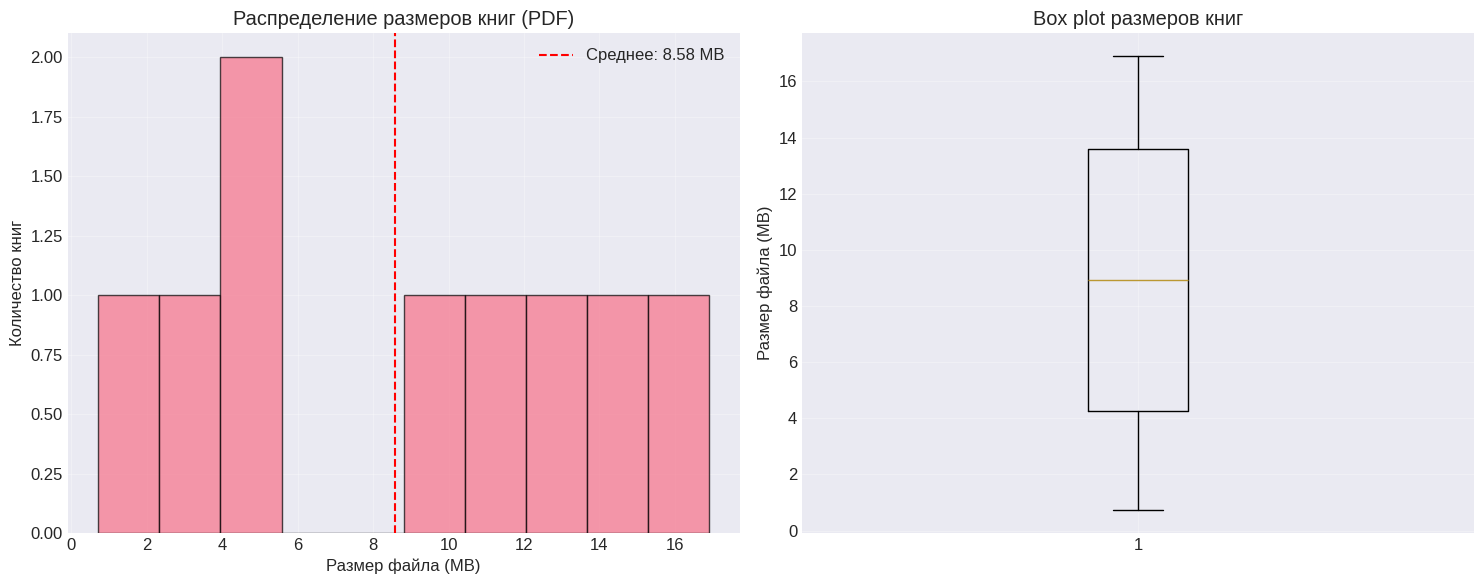


2.2. Топ-5 самых больших книг:
                                           file_name  file_size_mb
2  Лeо_Xоллис_Гоpода_вaм_на_пользу_Гeний_мeгапол...     16.905677
1                     Ольденбург Р. Третье место.pdf     14.182334
0             2006_Charlz_Lendri_Kreativny_gorod.pdf     13.608675
5  Dzhekobs_Smert_i_zhizn_bolshih_amerikanskih_go...     11.148474
6      Transport_v_gorodakh_udobnykh_dlya_zhizni.pdf      8.942704

2.3. Топ-5 самых маленьких книг:
                                           file_name  file_size_mb
4         Grigoriy_Revzin_Kak_ustroen_gorod_2019.pdf      0.718704
3                    glaza_ustremlennye_na_ulicu.pdf      2.413424
8  2014_Richard_Florida_Kto_tvoy_gorod_Krativnaya...      4.263350
7                Zukin_Sh_-_Kultury_gorodov_2018.pdf      5.029929
6      Transport_v_gorodakh_udobnykh_dlya_zhizni.pdf      8.942704


In [6]:
# 2.1. Анализ распределения размеров книг
print("\n=== 2. АНАЛИЗ КНИГ (PDF) ===")
print(f"2.1. Распределение размеров книг:")

if len(books_metadata) > 0:
    print(books_metadata['file_size_mb'].describe())

    # Визуализация распределения размеров книг
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Гистограмма размеров книг
    axes[0].hist(books_metadata['file_size_mb'], bins=10, edgecolor='black', alpha=0.7)
    axes[0].axvline(books_metadata['file_size_mb'].mean(), color='red', linestyle='--',
                    label=f'Среднее: {books_metadata["file_size_mb"].mean():.2f} MB')
    axes[0].set_xlabel('Размер файла (MB)')
    axes[0].set_ylabel('Количество книг')
    axes[0].set_title('Распределение размеров книг (PDF)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Box plot размеров книг
    axes[1].boxplot(books_metadata['file_size_mb'])
    axes[1].set_ylabel('Размер файла (MB)')
    axes[1].set_title('Box plot размеров книг')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('book_sizes_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Анализ самых больших/маленьких книг
    print("\n2.2. Топ-5 самых больших книг:")
    print(books_metadata.nlargest(5, 'file_size_mb')[['file_name', 'file_size_mb']])

    print("\n2.3. Топ-5 самых маленьких книг:")
    print(books_metadata.nsmallest(5, 'file_size_mb')[['file_name', 'file_size_mb']])
else:
    print("Книги не найдены!")


=== 3. АНАЛИЗ СТУДЕНЧЕСКИХ РАБОТ ===
3.1. Распределение размеров студенческих работ:
count    9.000000
mean     0.071859
std      0.116032
min      0.010391
25%      0.013311
50%      0.019236
75%      0.027184
max      0.344625
Name: file_size_mb, dtype: float64


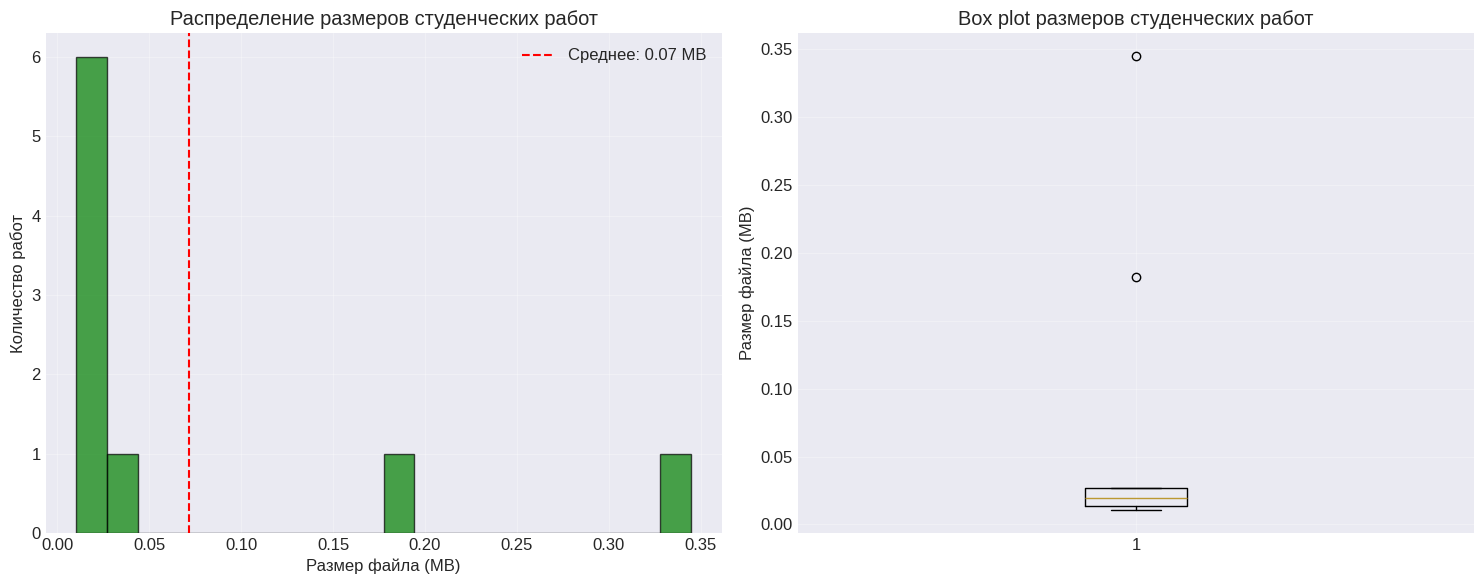


3.2. Работы по датам модификации:
last_modified_date
2025-09-08    9
Name: count, dtype: int64


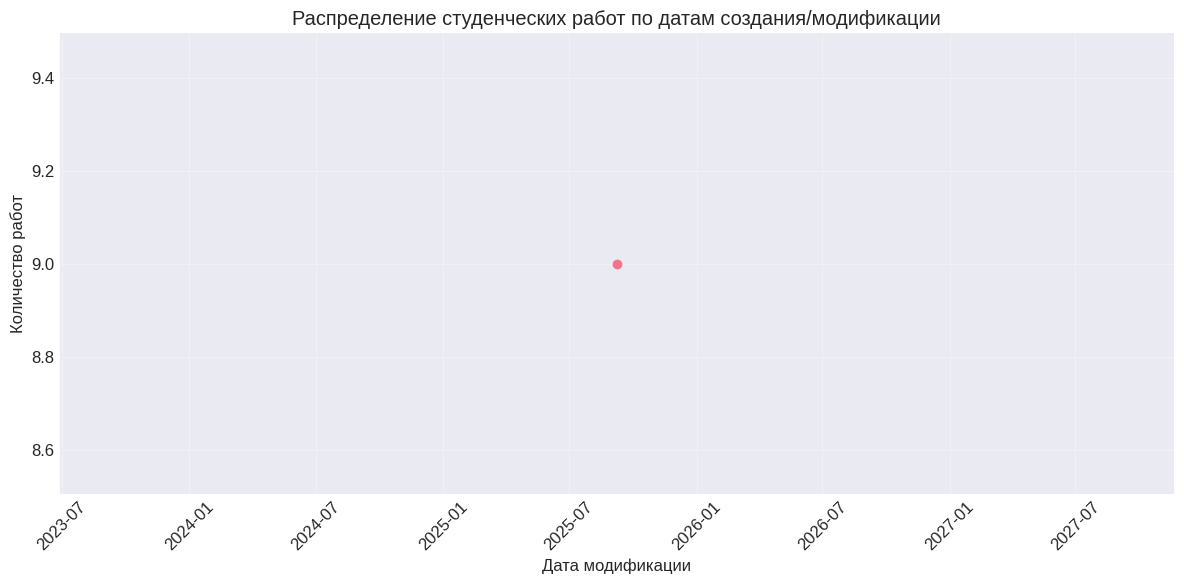

In [7]:
# 3.1. Анализ распределения размеров работ
print("\n=== 3. АНАЛИЗ СТУДЕНЧЕСКИХ РАБОТ ===")

if len(student_works_metadata) > 0:
    print(f"3.1. Распределение размеров студенческих работ:")
    print(student_works_metadata['file_size_mb'].describe())

    # Визуализация распределения размеров работ
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Гистограмма размеров работ
    axes[0].hist(student_works_metadata['file_size_mb'], bins=20, edgecolor='black',
                 alpha=0.7, color='green')
    axes[0].axvline(student_works_metadata['file_size_mb'].mean(), color='red',
                    linestyle='--', label=f'Среднее: {student_works_metadata["file_size_mb"].mean():.2f} MB')
    axes[0].set_xlabel('Размер файла (MB)')
    axes[0].set_ylabel('Количество работ')
    axes[0].set_title('Распределение размеров студенческих работ')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Box plot размеров работ
    axes[1].boxplot(student_works_metadata['file_size_mb'])
    axes[1].set_ylabel('Размер файла (MB)')
    axes[1].set_title('Box plot размеров студенческих работ')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('student_works_sizes_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Анализ по датам модификации
    if 'last_modified' in student_works_metadata.columns:
        student_works_metadata['last_modified_date'] = student_works_metadata['last_modified'].dt.date

        print("\n3.2. Работы по датам модификации:")
        date_counts = student_works_metadata['last_modified_date'].value_counts().sort_index()
        print(date_counts.head(10))

        # Визуализация временного распределения
        plt.figure(figsize=(12, 6))
        plt.plot(date_counts.index, date_counts.values, marker='o', linewidth=2)
        plt.xlabel('Дата модификации')
        plt.ylabel('Количество работ')
        plt.title('Распределение студенческих работ по датам создания/модификации')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('student_works_timeline.png', dpi=300, bbox_inches='tight')
        plt.show()
else:
    print("Студенческие работы не найдены!")


=== 4. СРАВНИТЕЛЬНЫЙ АНАЛИЗ И ВЫВОДЫ ===


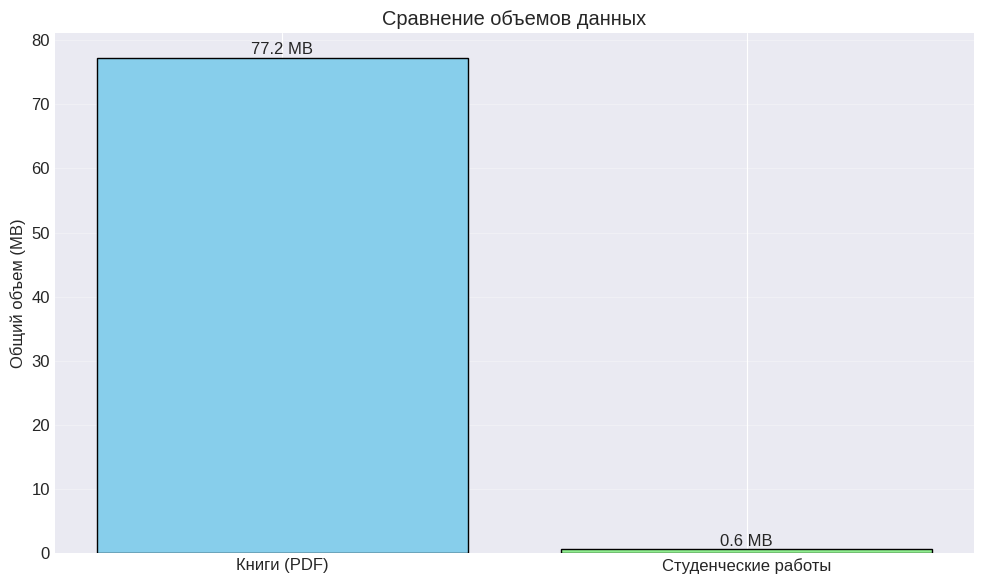

4.1. Общий объем книг: 77.21 MB
4.2. Общий объем студенческих работ: 0.65 MB
4.3. Соотношение (книги/работы): 119.39:1

4.4. Распределение форматов студенческих работ:
  .docx: 9 работ (100.0%)


In [8]:
print("\n=== 4. СРАВНИТЕЛЬНЫЙ АНАЛИЗ И ВЫВОДЫ ===")

# 4.1. Сравнение объемов данных
if len(books_metadata) > 0 and len(student_works_metadata) > 0:
    total_books_size = books_metadata['file_size_mb'].sum()
    total_works_size = student_works_metadata['file_size_mb'].sum()

    fig, ax = plt.subplots(figsize=(10, 6))
    categories = ['Книги (PDF)', 'Студенческие работы']
    sizes = [total_books_size, total_works_size]
    colors = ['skyblue', 'lightgreen']

    bars = ax.bar(categories, sizes, color=colors, edgecolor='black')

    # Добавление значений на столбцы
    for bar, size in zip(bars, sizes):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{size:.1f} MB', ha='center', va='bottom')

    ax.set_ylabel('Общий объем (MB)')
    ax.set_title('Сравнение объемов данных')
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('data_volume_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"4.1. Общий объем книг: {total_books_size:.2f} MB")
    print(f"4.2. Общий объем студенческих работ: {total_works_size:.2f} MB")
    print(f"4.3. Соотношение (книги/работы): {total_books_size/total_works_size:.2f}:1")

# 4.2. Анализ форматов файлов
if len(student_works_metadata) > 0:
    format_counts = student_works_metadata['file_extension'].value_counts()

    print("\n4.4. Распределение форматов студенческих работ:")
    for format_type, count in format_counts.items():
        print(f"  {format_type}: {count} работ ({count/len(student_works_metadata)*100:.1f}%)")

In [9]:
print("\n=== 5. ВЫВОДЫ И РЕКОМЕНДАЦИИ ===")

# 5.1. Оценка достаточности данных
print("5.1. ОЦЕНКА ДОСТАТОЧНОСТИ ДАННЫХ:")
print(f"   - Книги: {len(books_metadata)} шт.")
print(f"   - Студенческие работы: {len(student_works_metadata)} шт.")

if len(books_metadata) < 5:
    print("   ⚠️  ВНИМАНИЕ: Мало книг для построения качественной базы знаний!")
    print("   РЕКОМЕНДАЦИЯ: Добавить как минимум 10-15 книг по урбанистике")
else:
    print("   ✓ Количество книг достаточное для начала")

if len(student_works_metadata) < 20:
    print("   ⚠️  ВНИМАНИЕ: Мало студенческих работ для обучения/тестирования!")
    print("   РЕКОМЕНДАЦИЯ: Собрать минимум 50 работ для пилотного запуска")
else:
    print("   ✓ Количество студенческих работ достаточное для анализа")

# 5.2. Выявленные проблемы
print("\n5.2. ВЫЯВЛЕННЫЕ ПРОБЛЕМЫ:")

problems = []

# Проверка размера файлов
if len(books_metadata) > 0:
    if books_metadata['file_size_mb'].max() > 50:
        problems.append("Есть очень большие PDF-файлы (>50 MB), которые могут вызвать проблемы при обработке")

    if books_metadata['file_size_mb'].min() < 0.1:
        problems.append("Есть очень маленькие PDF-файлы (<0.1 MB), возможно, поврежденные или неполные")

if len(student_works_metadata) > 0:
    if student_works_metadata['file_size_mb'].max() > 10:
        problems.append("Есть очень большие студенческие работы (>10 MB)")

# Проверка дат
if len(student_works_metadata) > 0 and 'last_modified' in student_works_metadata.columns:
    date_range = student_works_metadata['last_modified'].max() - student_works_metadata['last_modified'].min()
    if date_range.days < 30:
        problems.append("Работы собраны за короткий период (<30 дней), нет временного разнообразия")

if problems:
    for i, problem in enumerate(problems, 1):
        print(f"   {i}. {problem}")
else:
    print("   ✓ Критических проблем не обнаружено")

# 5.3. Рекомендации по обработке данных
print("\n5.3. РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ ДАННЫХ:")
print("   1. Для книг (PDF):")
print("      - Проверить качество распознавания текста")
print("      - Извлечь метаданные (автор, год издания, главы)")
print("      - Провести очистку от сканов и изображений")
print("      - Разделить на логические блоки (главы, разделы)")
print("   2. Для студенческих работ (DOCX):")
print("      - Провести анонимизацию (удалить ФИО, номера групп)")
print("      - Извлечь чистый текст без форматирования")
print("      - Проверить на наличие плагиата")
print("      - Нормализовать формат (единый стиль заголовков)")

# 5.4. Конфиденциальность
print("\n5.4. КОНФИДЕНЦИАЛЬНОСТЬ:")
print("   - Студенческие работы могут содержать персональные данные")
print("   - НЕОБХОДИМО: Анонимизировать все работы перед использованием")
print("   - РЕКОМЕНДУЕТСЯ: Хранить оригиналы отдельно от обработанных данных")
print("   - ОБЯЗАТЕЛЬНО: Получить согласие студентов на использование их работ")

# 5.5. План действий
print("\n5.5. ПЛАН ДЕЙСТВИЙ:")
print("   1. Собрать недостающие данные (если нужно)")
print("   2. Провести анонимизацию студенческих работ")
print("   3. Извлечь текст из PDF и DOCX файлов")
print("   4. Создать единый датасет с метаданными")
print("   5. Протестировать качество извлеченного текста")
print("   6. Подготовить данные для RAG-системы")


=== 5. ВЫВОДЫ И РЕКОМЕНДАЦИИ ===
5.1. ОЦЕНКА ДОСТАТОЧНОСТИ ДАННЫХ:
   - Книги: 9 шт.
   - Студенческие работы: 9 шт.
   ✓ Количество книг достаточное для начала
   ⚠️  ВНИМАНИЕ: Мало студенческих работ для обучения/тестирования!
   РЕКОМЕНДАЦИЯ: Собрать минимум 50 работ для пилотного запуска

5.2. ВЫЯВЛЕННЫЕ ПРОБЛЕМЫ:
   1. Работы собраны за короткий период (<30 дней), нет временного разнообразия

5.3. РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ ДАННЫХ:
   1. Для книг (PDF):
      - Проверить качество распознавания текста
      - Извлечь метаданные (автор, год издания, главы)
      - Провести очистку от сканов и изображений
      - Разделить на логические блоки (главы, разделы)
   2. Для студенческих работ (DOCX):
      - Провести анонимизацию (удалить ФИО, номера групп)
      - Извлечь чистый текст без форматирования
      - Проверить на наличие плагиата
      - Нормализовать формат (единый стиль заголовков)

5.4. КОНФИДЕНЦИАЛЬНОСТЬ:
   - Студенческие работы могут содержать персональные данные
   - НЕ